<a href="https://colab.research.google.com/github/dreamjh20/Artificial-Intelligence-Study/blob/main/Mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image

!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install tensorflow
!pip install keras

import tensorflow as tf
import keras

In [ ]:
!pip install numpy
import numpy as np

In [ ]:
from keras.datasets import mnist
(train_images, traim_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
traim_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

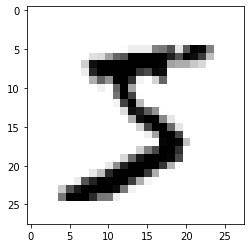

In [ ]:
digit = train_images[0]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [ ]:
origin_my_image = test_images[0]

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
model.add(layers.Dense(256, activation='relu', ))
model.add(layers.Dense(128, activation='relu', ))
model.add(layers.Dense(64, activation='relu', ))

model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
train_images.shape

(60000, 784)

In [ ]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
traim_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
traim_labels = to_categorical(traim_labels)
traim_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
test_labels = to_categorical(test_labels)

In [ ]:
model.fit(train_images, traim_labels, epochs=9, batch_size=128)

Epoch 1/9
469/469 [==============================] - 2s 3ms/step - loss: 0.5113 - accuracy: 0.8383
Epoch 2/9
469/469 [==============================] - 2s 3ms/step - loss: 0.0980 - accuracy: 0.9698
Epoch 3/9
469/469 [==============================] - 2s 4ms/step - loss: 0.0643 - accuracy: 0.9803
Epoch 4/9
469/469 [==============================] - 2s 4ms/step - loss: 0.0451 - accuracy: 0.9872
Epoch 5/9
469/469 [==============================] - 2s 3ms/step - loss: 0.0349 - accuracy: 0.9890
Epoch 6/9
469/469 [==============================] - 2s 3ms/step - loss: 0.0295 - accuracy: 0.9915
Epoch 7/9
469/469 [==============================] - 2s 3ms/step - loss: 0.0240 - accuracy: 0.9930
Epoch 8/9
469/469 [==============================] - 2s 4ms/step - loss: 0.0187 - accuracy: 0.9942
Epoch 9/9
469/469 [==============================] - 2s 4ms/step - loss: 0.0185 - accuracy: 0.9944


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.9800


In [ ]:
test_acc

0.9800000190734863

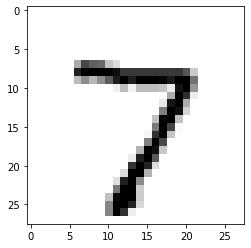

In [ ]:
myDigit = origin_my_image
plt.imshow(myDigit, cmap=plt.cm.binary)

In [ ]:
my_image = digit.reshape(1, 28*28)
output = model.predict(my_image)
print('result:', np.argmax(output))

result: 5


In [ ]:
img = Image.open("5.jpg")
img_data = np.array(img)
img_data.shape

(28, 28, 3)

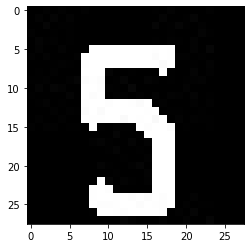

In [ ]:
plt.imshow(img_data)

In [ ]:
trans_img = img_data.transpose(2, 0, 1)
trans_img.shape

(3, 28, 28)

In [ ]:
trans_test_img = trans_img[0].reshape((1,28*28))
trans_test_img = trans_test_img.astype('float32')/255

In [ ]:
output = model.predict(trans_test_img)
print("결과는: ", np.argmax(output))

결과는:  5
